# Data Mining Fall 2023 Final Project 

Team members:
- Nguyen Minh Duc (20202026)
- Nguyen Thu Phuong (20202027)

------------------------------------------------------------

## Load libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Read data

In [224]:
df = pd.read_csv("./housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

## Process data

In [225]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

--> There are missing data in the column total_bedrooms

In [226]:
median = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median)

In [227]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
del df['total_bedrooms'], df['total_rooms']

In [228]:
scaler = StandardScaler()

col_list = list(df)
col_list.remove('ocean_proximity')
col_list.remove('median_house_value')

df_numeric = df[col_list]
df_scaled = scaler.fit_transform(df_numeric)

df_scaled_df = pd.DataFrame(df_scaled, index=df_numeric.index, columns=df_numeric.columns)

df = pd.concat([df_scaled_df, df['median_house_value'], df['ocean_proximity']], axis=1)
df

longitude  latitude  housing_median_age  population  households  \
0      -1.327835  1.052548            0.982143   -0.974429   -0.977033   
1      -1.322844  1.043185           -0.607019    0.861439    1.669961   
2      -1.332827  1.038503            1.856182   -0.820777   -0.843637   
3      -1.337818  1.038503            1.856182   -0.766028   -0.733781   
4      -1.337818  1.038503            1.856182   -0.759847   -0.629157   
...          ...       ...                 ...         ...         ...   
20635  -0.758826  1.801647           -0.289187   -0.512592   -0.443449   
20636  -0.818722  1.806329           -0.845393   -0.944405   -1.008420   
20637  -0.823713  1.778237           -0.924851   -0.369537   -0.174042   
20638  -0.873626  1.778237           -0.845393   -0.604429   -0.393753   
20639  -0.833696  1.750146           -1.004309   -0.033977    0.079672   

       median_income  rooms_per_household  bedrooms_per_room  \
0           2.344766             0.628559          -1.029988   
1           2.332238             0.327041          -0.888897   
2           1.782699             1.155620          -1.291686   
3           0.932968             0.156966          -0.449613   
4          -0.012881             0.344711          -0.639087   
...              ...                  ...                ...   
20635      -1.216128            -0.155023           0.165994   
20636      -0.691593             0.276881           0.021671   
20637      -1.142593            -0.090318           0.021134   
20638      -1.054583            -0.040211           0.093467   
20639      -0.780129            -0.070443           0.113275   

       median_house_value ocean_proximity  
0                452600.0        NEAR BAY  
1                358500.0        NEAR BAY  
2                352100.0        NEAR BAY  
3                341300.0        NEAR BAY  
4                342200.0        NEAR BAY  
...                   ...             ...  
20635             78100.0          INLAND  
20636             77100.0          INLAND  
20637             92300.0          INLAND  
20638             84700.0          INLAND  
20639             89400.0          INLAND  

[20640 rows x 10 columns]

In [229]:
df["ocean_proximity"].value_counts().keys()

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

In [230]:
df = pd.get_dummies(df)
df

longitude  latitude  housing_median_age  population  households  \
0      -1.327835  1.052548            0.982143   -0.974429   -0.977033   
1      -1.322844  1.043185           -0.607019    0.861439    1.669961   
2      -1.332827  1.038503            1.856182   -0.820777   -0.843637   
3      -1.337818  1.038503            1.856182   -0.766028   -0.733781   
4      -1.337818  1.038503            1.856182   -0.759847   -0.629157   
...          ...       ...                 ...         ...         ...   
20635  -0.758826  1.801647           -0.289187   -0.512592   -0.443449   
20636  -0.818722  1.806329           -0.845393   -0.944405   -1.008420   
20637  -0.823713  1.778237           -0.924851   -0.369537   -0.174042   
20638  -0.873626  1.778237           -0.845393   -0.604429   -0.393753   
20639  -0.833696  1.750146           -1.004309   -0.033977    0.079672   

       median_income  rooms_per_household  bedrooms_per_room  \
0           2.344766             0.628559          -1.029988   
1           2.332238             0.327041          -0.888897   
2           1.782699             1.155620          -1.291686   
3           0.932968             0.156966          -0.449613   
4          -0.012881             0.344711          -0.639087   
...              ...                  ...                ...   
20635      -1.216128            -0.155023           0.165994   
20636      -0.691593             0.276881           0.021671   
20637      -1.142593            -0.090318           0.021134   
20638      -1.054583            -0.040211           0.093467   
20639      -0.780129            -0.070443           0.113275   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                452600.0                      False                   False   
1                358500.0                      False                   False   
2                352100.0                      False                   False   
3                341300.0                      False                   False   
4                342200.0                      False                   False   
...                   ...                        ...                     ...   
20635             78100.0                      False                    True   
20636             77100.0                      False                    True   
20637             92300.0                      False                    True   
20638             84700.0                      False                    True   
20639             89400.0                      False                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       False                      True   
1                       False                      True   
2                       False                      True   
3                       False                      True   
4                       False                      True   
...                       ...                       ...   
20635                   False                     False   
20636                   False                     False   
20637                   False                     False   
20638                   False                     False   
20639                   False                     False   

       ocean_proximity_NEAR OCEAN  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  
...                           ...  
20635                       False  
20636                       False  
20637                       False  
20638                       False  
20639                       False  

[20640 rows x 14 columns]

## Prepare training and testing data

In [231]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("# of train set: %.0f. # of test set: %.0f" % (train_set.shape[0], test_set.shape[0]))

# of train set: 16512. # of test set: 4128


# Regression

In [232]:
train_set_features = train_set.drop('median_house_value', axis=1)
train_set_target = train_set['median_house_value'].copy()

## 1. Linear Regression

In [235]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(train_set_features, train_set_target)
print("Learned Parameters : ")
print(lin_reg.coef_)
print(lin_reg.intercept_)

print("Train_r2_score : ", lin_reg.score(train_set_features, train_set_target))

Learned Parameters : 
[-55422.61146211 -55922.52473881  13931.87129285 -45366.15317082
  50405.67617092  79046.60494598   9246.25383185  18286.50217495
 250764.13923587 216218.49188669 384918.92572909 245816.71146421
 254237.6987753 ]
-32768.0
Train_r2_score :  0.6578360445256367


In [236]:
test_set_features = test_set.drop('median_house_value', axis=1)
test_set_target = test_set['median_house_value'].copy()

final_model = lin_reg
final_predictions = final_model.predict(test_set_features)

print("Test_r2_score : ", r2_score(test_set_target, final_predictions))

delta = test_set_target - final_predictions
print("Errors (%) in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_mse = mean_squared_error(test_set_target, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE is : ", final_rmse)

Test_r2_score :  0.6006818149596924
Errors (%) in housing value prediction :  0.2973072304321171
RMSE is :  72337.41320034052


### 1.2 Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model_ridge = Ridge(alpha=100)
model_ridge.fit(train_set_features, train_set_target)

print("Train_score : ", model_ridge.score(train_set_features, train_set_target))

ridge_predicted = model_ridge.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target, ridge_predicted))

delta = test_set_target - ridge_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_ridge_mse = mean_squared_error(test_set_target, ridge_predicted)
final_ridge_rmse = np.sqrt(final_ridge_mse)

print("final_ridge_RMSE : ", final_ridge_rmse)

import warnings
warnings.filterwarnings(action='ignore')

Train_score :  0.652511581004448
Test_score :  0.6333956237676854
Errors in housing value prediction :  0.28415587884460825
final_ridge_RMSE :  69746.54943237505


### 1.3 Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1000)
model_lasso.fit(train_set_features, train_set_target)

print("Train_score : ", model_lasso.score(train_set_features, train_set_target))

lasso_predicted = model_lasso.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target, lasso_predicted))

delta = test_set_target - lasso_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_lasso_mse = mean_squared_error(test_set_target, lasso_predicted)
final_lasso_rmse = np.sqrt(final_lasso_mse)
print("RMSE is : ", final_lasso_rmse)

Train_score :  0.6477329919156221
Test_score :  0.6353285577365648
Errors in housing value prediction :  0.28205728594262436
RMSE is :  69562.43590540203


### 1.4 Multi-Layer Perception

In [15]:
from sklearn.neural_network import MLPRegressor

model_MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (32,64,32), max_iter = 1000, solver = 'lbfgs', random_state = 0)
model_MLP.fit(train_set_features, train_set_target)

print("Train_score : ", model_MLP.score(train_set_features, train_set_target))

MLP_predicted = model_MLP.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target, MLP_predicted))

delta = test_set_target - MLP_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_MLP_mse = mean_squared_error(test_set_target, MLP_predicted)
final_MLP_rmse = np.sqrt(final_MLP_mse)
print("RMSE is : ", final_MLP_rmse)

Train_score :  0.8455495152746556
Test_score :  0.8132458517368903
Errors in housing value prediction :  0.18363589054138313
RMSE is :  49780.47460661151


## 2. Tree

### 2.1 Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(train_set_features, train_set_target)

print("Train_score : ", tree.score(train_set_features, train_set_target))

tree_predicted = tree.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target, tree_predicted))

delta = test_set_target - tree_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_tree_mse = mean_squared_error(test_set_target, tree_predicted)
final_tree_rmse = np.sqrt(final_tree_mse)
print("RMSE is : ", final_tree_rmse)

Train_score :  0.8296706225058965
Test_score :  0.7302529894860228
Errors in housing value prediction :  0.21849641902636996
RMSE is :  59827.688575587126


### 2.2 Random Forest

In [237]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(n_estimators=32)
tree.fit(train_set_features, train_set_target)

print("Train_score : ", tree.score(train_set_features, train_set_target))

tree_predicted = tree.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target, tree_predicted))

delta = test_set_target - tree_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_tree_mse = mean_squared_error(test_set_target, tree_predicted)
final_tree_rmse = np.sqrt(final_tree_mse)
print("RMSE is : ", final_tree_rmse)

Train_score :  0.9708858512129912
Test_score :  0.8060560396556508
Errors in housing value prediction :  0.18391273587901313
RMSE is :  50412.88594306344


/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<BarContainer object of 13 artists>

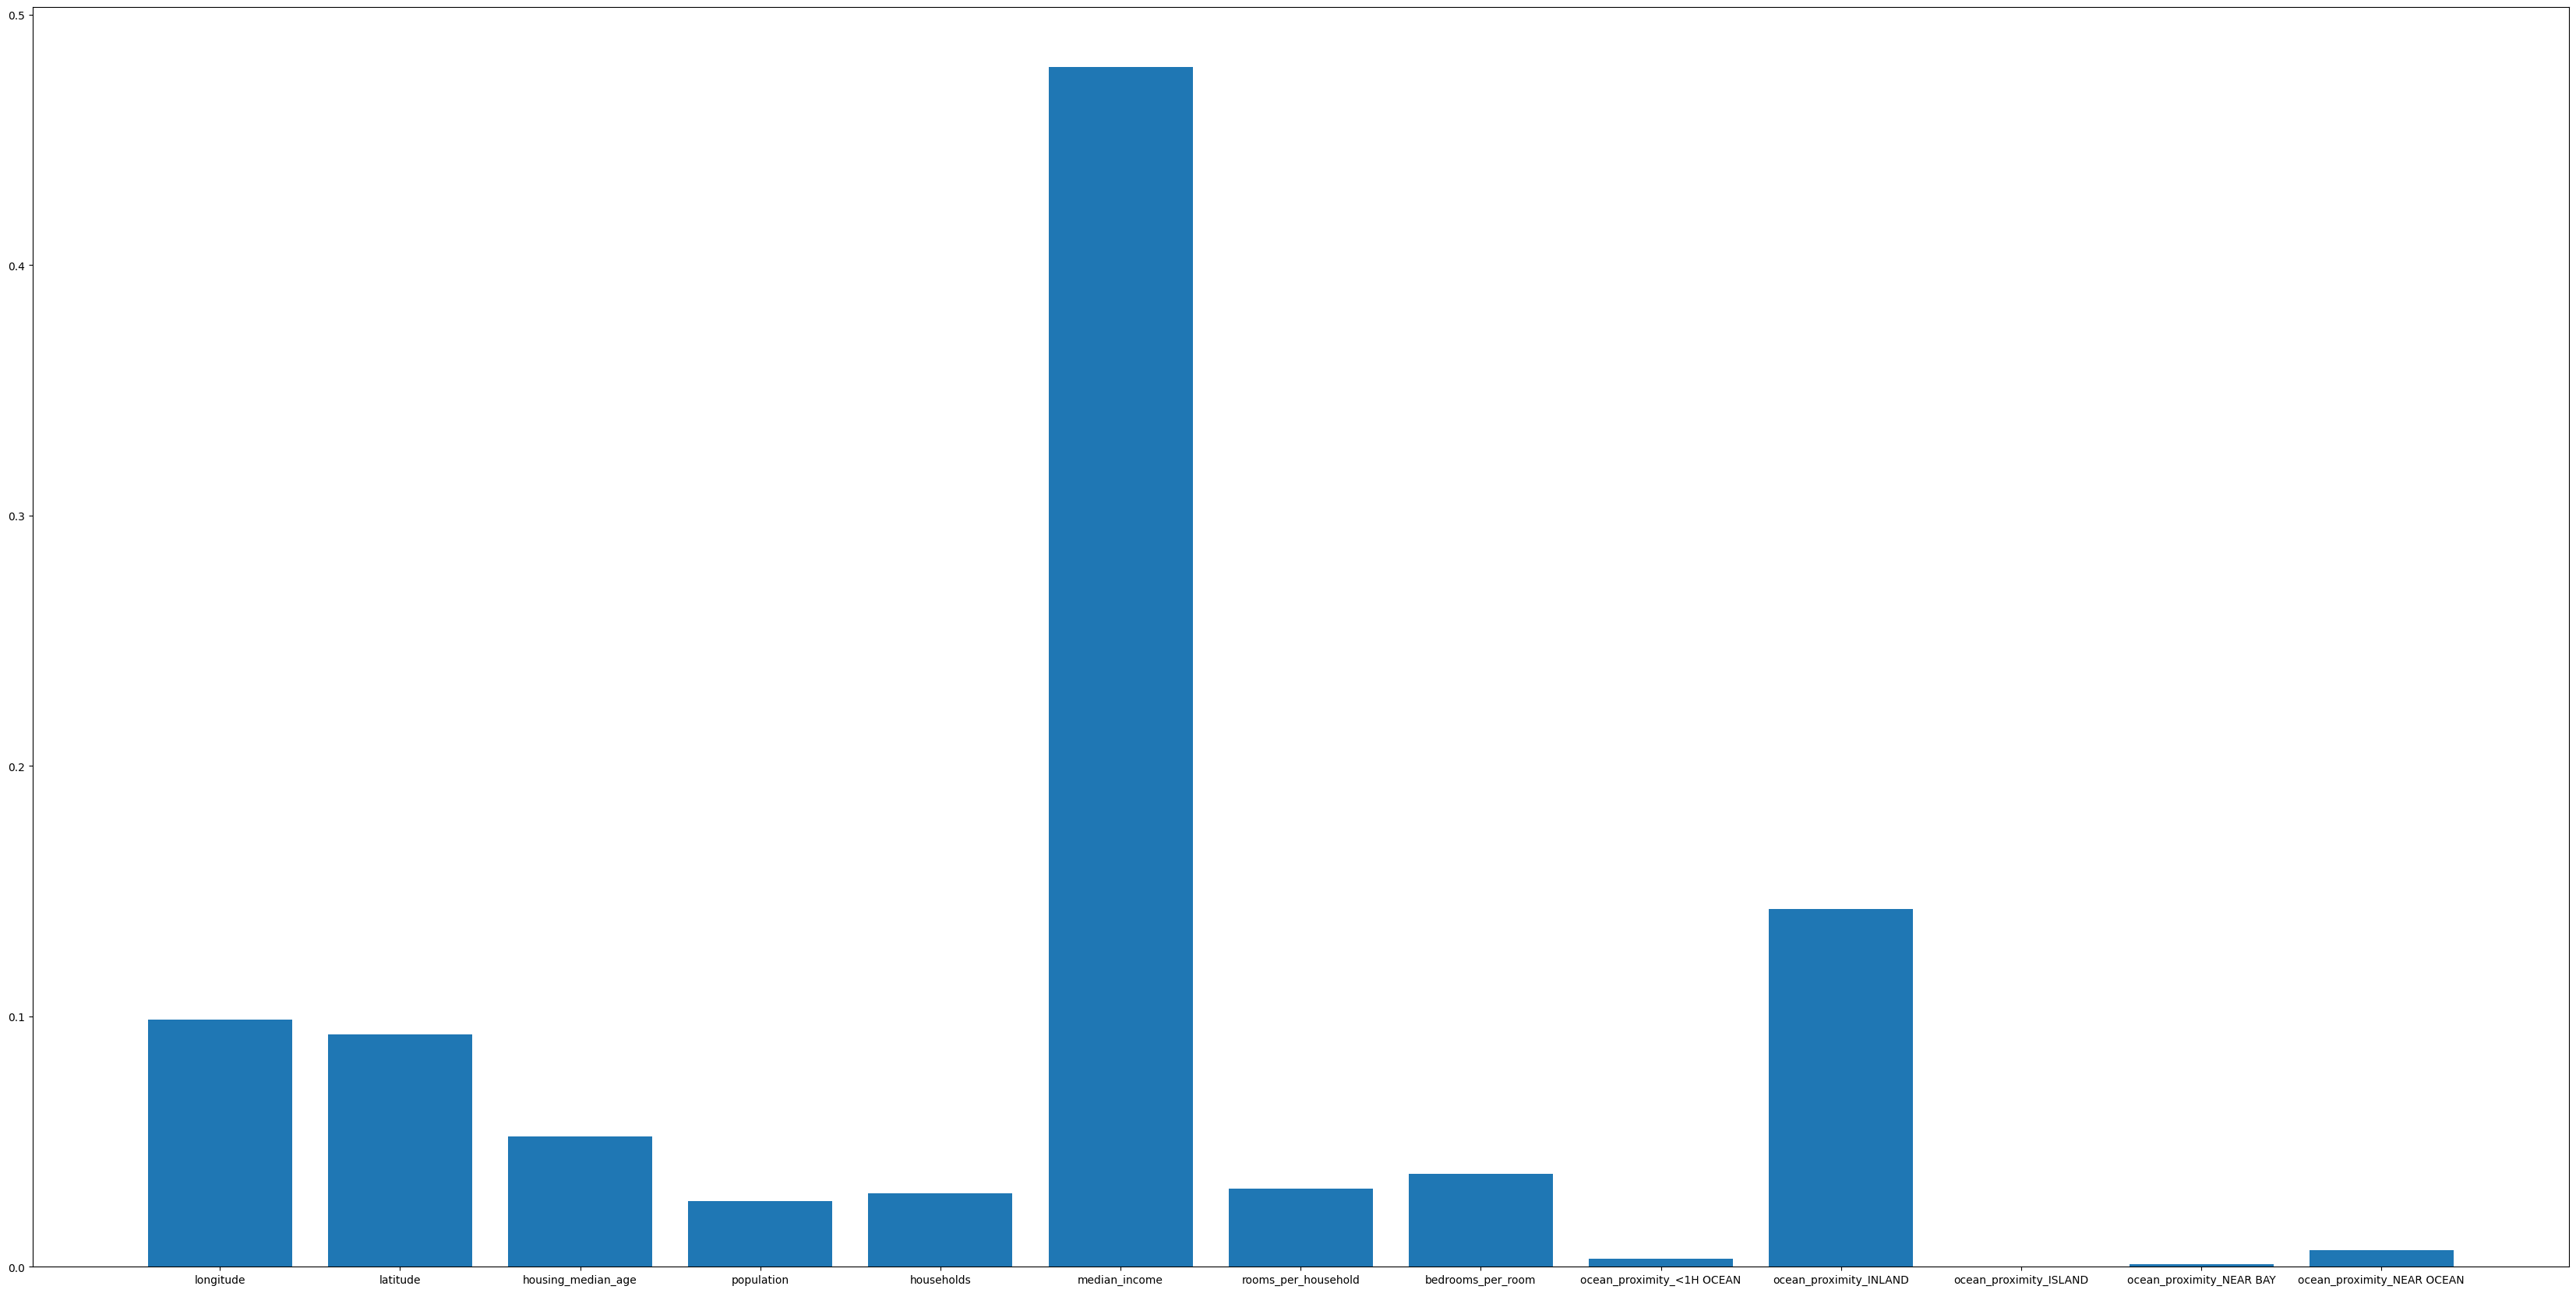

In [249]:
train_set_features.columns[:len(tree.feature_importances_)]
plt.figure(figsize=(42,21))
plt.bar(x=train_set_features.columns[:len(tree.feature_importances_)], height=tree.feature_importances_)

# Classification

In [84]:
targets = list(filter(lambda x: x.startswith("ocean_proximity"), df.columns))
# Convert the list into a dictionary with default values
targets = {key: idx for idx, key in enumerate(targets)}
targets

{'ocean_proximity_<1H OCEAN': 0,
 'ocean_proximity_INLAND': 1,
 'ocean_proximity_ISLAND': 2,
 'ocean_proximity_NEAR BAY': 3,
 'ocean_proximity_NEAR OCEAN': 4}

In [112]:
scaler = StandardScaler()

col_list = list(df)
col_list = [x for x in col_list if x not in targets]
# col_list.remove('median_house_value')

df_numeric = df[col_list]
df_scaled = scaler.fit_transform(df_numeric)

df_scaled_df = pd.DataFrame(df_scaled, index=df_numeric.index, columns=df_numeric.columns)

df = pd.concat([df_scaled_df, df[targets.keys()]], axis=1)
df

longitude  latitude  housing_median_age  population  households  \
0      -1.327835  1.052548            0.982143   -0.974429   -0.977033   
1      -1.322844  1.043185           -0.607019    0.861439    1.669961   
2      -1.332827  1.038503            1.856182   -0.820777   -0.843637   
3      -1.337818  1.038503            1.856182   -0.766028   -0.733781   
4      -1.337818  1.038503            1.856182   -0.759847   -0.629157   
...          ...       ...                 ...         ...         ...   
20635  -0.758826  1.801647           -0.289187   -0.512592   -0.443449   
20636  -0.818722  1.806329           -0.845393   -0.944405   -1.008420   
20637  -0.823713  1.778237           -0.924851   -0.369537   -0.174042   
20638  -0.873626  1.778237           -0.845393   -0.604429   -0.393753   
20639  -0.833696  1.750146           -1.004309   -0.033977    0.079672   

       median_income  rooms_per_household  bedrooms_per_room  \
0           2.344766             0.628559          -1.029988   
1           2.332238             0.327041          -0.888897   
2           1.782699             1.155620          -1.291686   
3           0.932968             0.156966          -0.449613   
4          -0.012881             0.344711          -0.639087   
...              ...                  ...                ...   
20635      -1.216128            -0.155023           0.165994   
20636      -0.691593             0.276881           0.021671   
20637      -1.142593            -0.090318           0.021134   
20638      -1.054583            -0.040211           0.093467   
20639      -0.780129            -0.070443           0.113275   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                2.129631                      False                   False   
1                1.314156                      False                   False   
2                1.258693                      False                   False   
3                1.165100                      False                   False   
4                1.172900                      False                   False   
...                   ...                        ...                     ...   
20635           -1.115804                      False                    True   
20636           -1.124470                      False                    True   
20637           -0.992746                      False                    True   
20638           -1.058608                      False                    True   
20639           -1.017878                      False                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       False                      True   
1                       False                      True   
2                       False                      True   
3                       False                      True   
4                       False                      True   
...                       ...                       ...   
20635                   False                     False   
20636                   False                     False   
20637                   False                     False   
20638                   False                     False   
20639                   False                     False   

       ocean_proximity_NEAR OCEAN  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  
...                           ...  
20635                       False  
20636                       False  
20637                       False  
20638                       False  
20639                       False  

[20640 rows x 14 columns]

In [113]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("# of train set: %.0f. # of test set: %.0f" % (train_set.shape[0], test_set.shape[0]))

# of train set: 16512. # of test set: 4128


In [114]:
train_class_set = train_set.copy()
train_class_set["ocean_proximity"] = train_class_set[targets.keys()].to_numpy().argmax(axis=1)
X_train = train_class_set.drop(targets.keys(), axis=1)
X_train = X_train.drop("ocean_proximity", axis=1).to_numpy()
y_train = train_class_set["ocean_proximity"].copy().to_numpy()

In [115]:
test_class_set = test_set.copy()
test_class_set["ocean_proximity"] = test_class_set[targets.keys()].to_numpy().argmax(axis=1)
X_test = test_class_set.drop(targets.keys(), axis=1)
X_test = X_test.drop("ocean_proximity", axis=1).to_numpy()
y_test = test_class_set["ocean_proximity"].copy().to_numpy()

In [116]:
X_train.shape

(16512, 9)

In [117]:
y_train.shape

(16512,)

<Axes: xlabel='latitude', ylabel='longitude'>

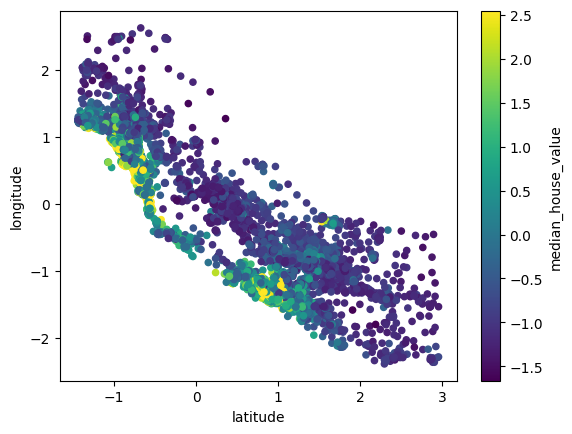

In [138]:
#train_class_set.plot.scatter(x = 'median_house_value', y= 'ocean_proximity')
train_class_set.plot.scatter(x = 'latitude', y= 'longitude', c = 'median_house_value')

<Axes: xlabel='latitude', ylabel='longitude'>

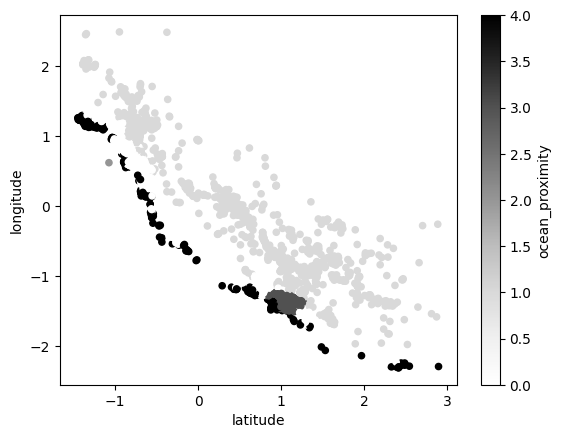

In [119]:
#train_class_set.plot.scatter(x = 'median_house_value', y= 'ocean_proximity')
test_class_set.plot.scatter(x = 'latitude', y= 'longitude', c = 'ocean_proximity')

<Axes: ylabel='Frequency'>

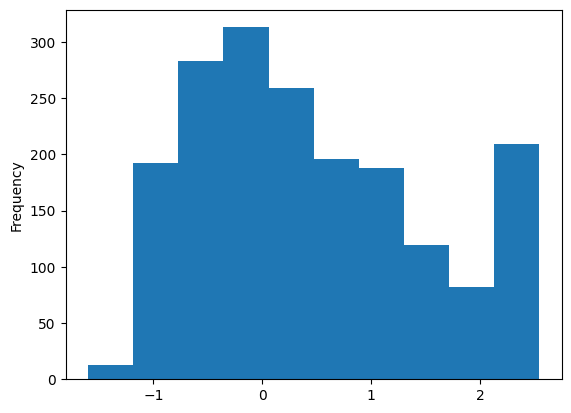

In [120]:
train_class_set[train_class_set['ocean_proximity_NEAR BAY']]["median_house_value"].plot.hist()

## 1. Support Vector Machine
### 1.1. Linear SVM

In [189]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# You can build SVM model (linear SVM) with scikit-learn.
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Evaluate the classifier with testset.
y_pred = linear_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of Linear SVM:", accuracy)
print("Precision of Linear SVM:", precision)
print("Recall of Linear SVM:", recall)
print("F1 of Linear SVM:", f1)

Accuracy of Linear SVM: 0.7931201550387597
Precision of Linear SVM: 0.5705692058329271
Recall of Linear SVM: 0.5522860508006293
F1 of Linear SVM: 0.5304590369719626


/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


You can also apply the **cross-validation** when training the model.

It also can be obtained by scikit-learn package.


For example, let me train the model using **StratifiedKFold**.

In [176]:
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

In [177]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Set K=5 and shuffle=True. (You can change the number of K.)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

linear_svm = SVC(kernel='linear')
cv_scores = []

#Iterate all of the cross-validation sets.
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    linear_svm.fit(X_train, y_train)
    y_pred = linear_svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

print("Accuracy for Cross-validation:", cv_scores)
print("Avg of Accuracies:", sum(cv_scores) / len(cv_scores))

Accuracy for Cross-validation: [0.8052325581395349, 0.8040213178294574, 0.7955426356589147, 0.8001453488372093, 0.7931201550387597]
Avg of Accuracies: 0.7996124031007752


### 1.2. Soft Margin SVM

In [190]:
from sklearn.svm import SVC

# Same as Linear SVM, but we can adjust the margin with a parameter.
soft_margin_svm = SVC(kernel='linear', C=0.95)  # C를 조절하여 마진을 조절할 수 있습니다.
soft_margin_svm.fit(X_train, y_train)

# 테스트 세트를 사용하여 모델의 성능을 평가합니다.
y_pred = soft_margin_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of Soft Margin SVM:", accuracy)
print("Precision of Soft Margin SVM:", precision)
print("Recall of Soft Margin SVM:", recall)
print("F1 of Soft Margin SVM:", f1)

Accuracy of Soft Margin SVM: 0.7936046511627907
Precision of Soft Margin SVM: 0.570967067763743
Recall of Soft Margin SVM: 0.5525048691813733
F1 of Soft Margin SVM: 0.5307834886039141


/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Set K=5 and shuffle=True. (You can change the number of K.)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

soft_margin_svm = SVC(kernel='linear', C=0.95)  # C를 조절하여 마진을 조절할 수 있습니다.
cv_scores = []

#Iterate all of the cross-validation sets.
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    soft_margin_svm.fit(X_train, y_train)
    y_pred = soft_margin_svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

print("Accuracy for Cross-validation:", cv_scores)
print("Avg of Accuracies:", sum(cv_scores) / len(cv_scores))

Accuracy for Cross-validation: [0.8054748062015504, 0.8037790697674418, 0.7953003875968992, 0.8001453488372093, 0.7936046511627907]
Avg of Accuracies: 0.7996608527131783


### 1.3. Kernel SVM

In [191]:
from sklearn.svm import SVC

#Same as Linear SVM, you can easily build this model with scikit-learn.

# You can build SVM model (kernel SVM) with scikit-learn.
# Here, I use RBF kernel. You can use different kernels you want.
kernel_svm = SVC(kernel='rbf')
kernel_svm.fit(X_train, y_train)

# Evaluate the classifier with testset.
y_pred = kernel_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of Kernel SVM:", accuracy)
print("Precision of Kernel SVM:", precision)
print("Recall of Kernel SVM:", recall)
print("F1 of Kernel SVM:", f1)


Accuracy of Kernel SVM: 0.8556201550387597
Precision of Kernel SVM: 0.6623448207089149
Recall of Kernel SVM: 0.640684616218077
F1 of Kernel SVM: 0.642061802446652


/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Set K=5 and shuffle=True. (You can change the number of K.)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

kernel_svm = SVC(kernel='rbf')
cv_scores = []

#Iterate all of the cross-validation sets.
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    kernel_svm.fit(X_train, y_train)
    y_pred = kernel_svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

print("Accuracy for Cross-validation:", cv_scores)
print("Avg of Accuracies:", sum(cv_scores) / len(cv_scores))

Accuracy for Cross-validation: [0.8638565891472868, 0.8512596899224806, 0.8633720930232558, 0.8546511627906976, 0.8556201550387597]
Avg of Accuracies: 0.8577519379844961


## 2. Tree
### 2.1 Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier

# Build Decision Tree model and train it.
decision_tree = DecisionTreeClassifier(max_depth=17)
decision_tree.fit(X_train, y_train)

# Evaluation
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of Decision Tree:", accuracy)
print("Precision of Decision Tree:", precision)
print("Recall of Decision Tree:", recall)
print("F1 of Decision Tree:", f1)

Accuracy of Decision Tree: 0.9745639534883721
Precision of Decision Tree: 0.9743647876565014
Recall of Decision Tree: 0.978035913442565
F1 of Decision Tree: 0.9761774069830371


<BarContainer object of 9 artists>

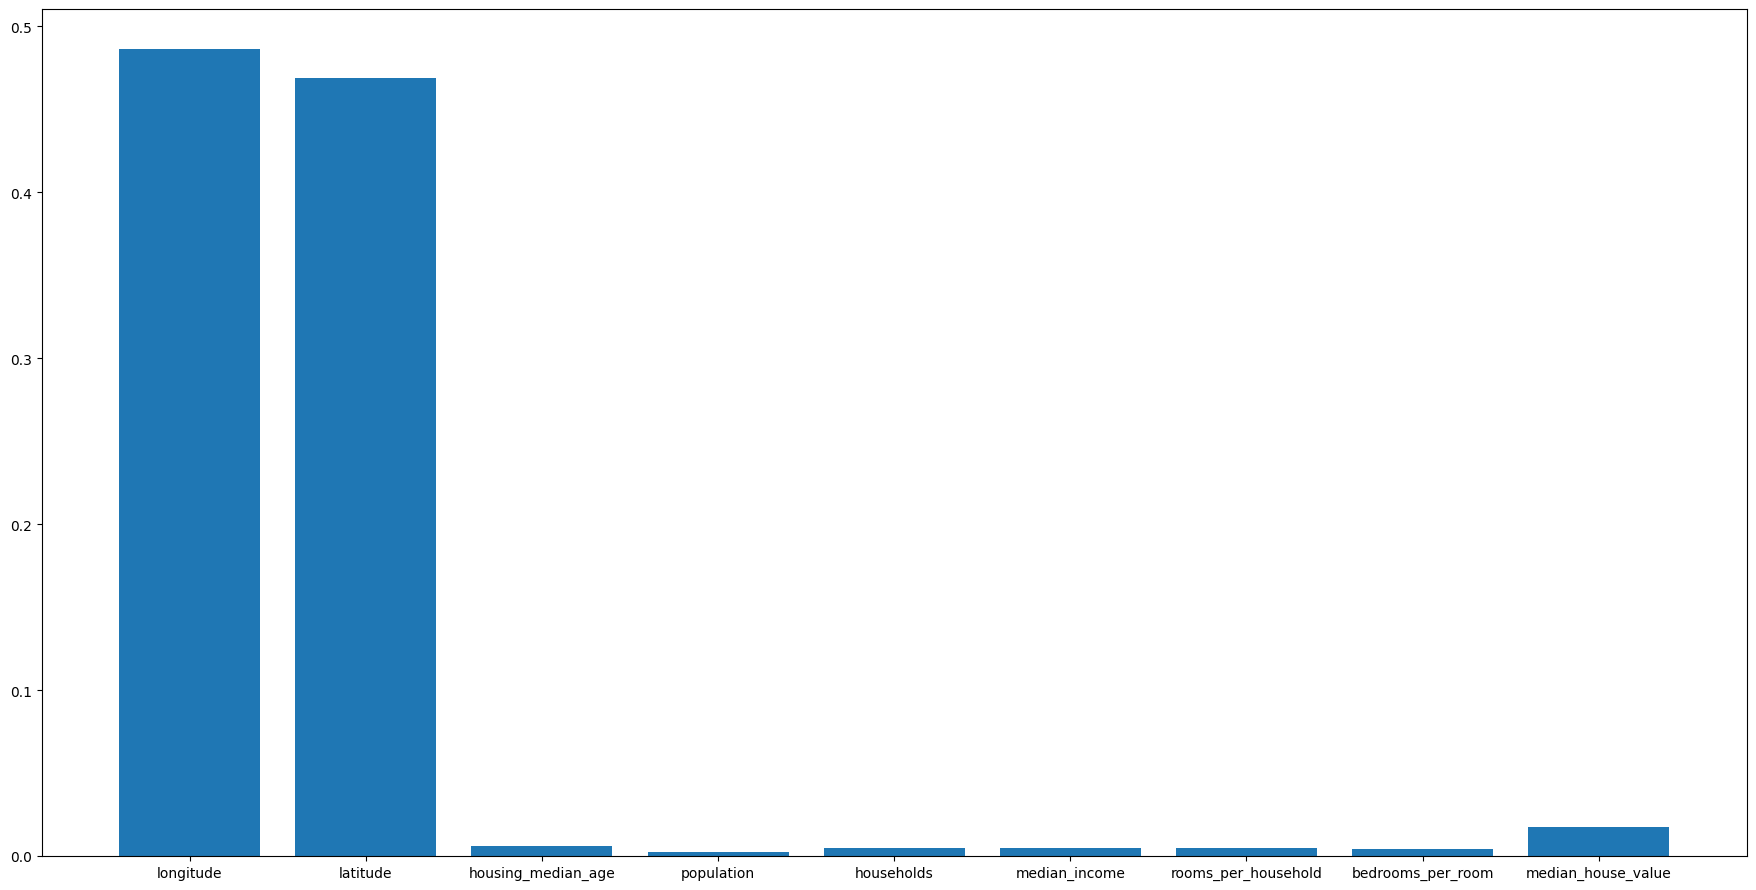

In [222]:
plt.figure(figsize=(22,11))
plt.bar(x=train_class_set.columns[:len(decision_tree.feature_importances_)], height=decision_tree.feature_importances_)

In [128]:
from collections import Counter
Counter(y_test.tolist())

Counter({0: 1795, 1: 1324, 4: 572, 3: 436, 2: 1})

In [129]:
#decision_tree.feature_importances_#.tree_.value.shape#.get_n_leaves()#.get_depth()# .decision_path(X_test).toarray()
Counter(y_pred.tolist())

Counter({0: 1839, 1: 1315, 4: 533, 3: 440, 2: 1})

### 2.2 Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest and train it.
random_forest = RandomForestClassifier(n_estimators=128, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluation
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of Random Forest:", accuracy)
print("Precision of Random Forest:", precision)
print("Recall of Random Forest:", recall)
print("F1 of Random Forest:", f1)

Accuracy of Random Forest: 0.9651162790697675
Precision of Random Forest: 0.766261301412745
Recall of Random Forest: 0.7683081709323085
F1 of Random Forest: 0.7671472680382585


/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Linear Discriminant Analysis

In [204]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Build Linear Discriminant Analysis and train it.
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluation
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy of LDA:", accuracy)
print("Precision of LDA:", precision)
print("Recall of LDA:", recall)
print("F1 of LDA:", f1)

Accuracy of LDA: 0.7589631782945736
Precision of LDA: 0.5545433669386449
Recall of LDA: 0.5306518760247306
F1 of LDA: 0.5092441127074954


## Evaluation metrics
Here, as an example, I will briefly show you how to evaluate a model using various classification evaluation metrics as well as accuracy for random forest, so try applying it to several models and use it as a reference in the final project.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Visualize AUC-ROC curve
y_scores = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Dimensionality Reduction
# 1. PCA
## 1.1 PCA (Linear)

We will reduce the dimension of dataset into 2 dimensions and visualize it using scikit-learn and matplotlib packages.

The data is the same as used in the above task.

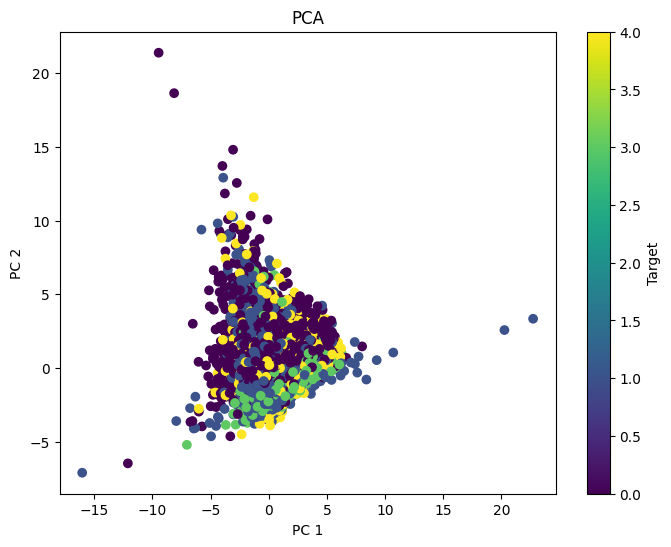

In [205]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Build a PCA model and reduce the dimensionality into 2. (You can change the number of dimension as you want.)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

## 1.2. Kernel PCA

This is used for reducing dimensionality of non-linear data.

The method is almost same with linear PCA.

But in the dataset we used here, which is assumed as linear, the kernel PCA is not appropriate.

So, when doing the final project, just use the method that suits your data.

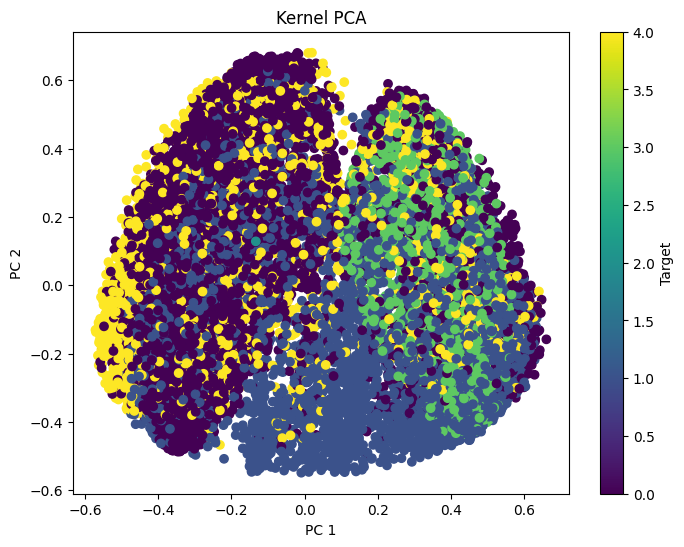

In [206]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Build a Kernel PCA model and reduce the dimensionality into 2.
# I use rbf kernel.
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

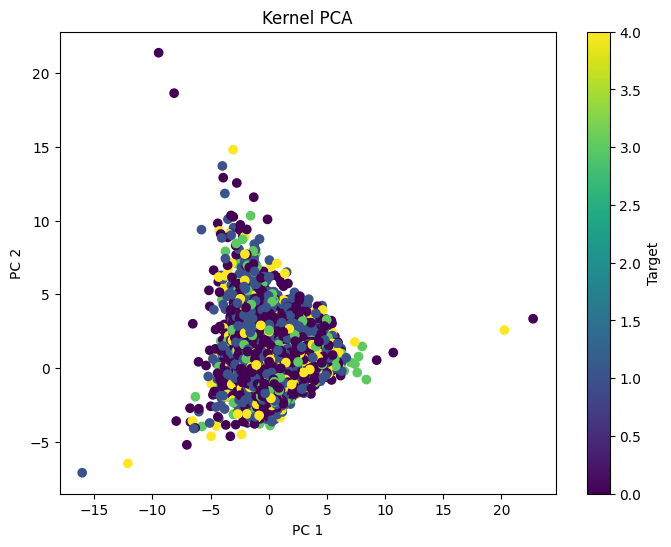

In [209]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preprocessing the data
# Imputing missing values in 'total_bedrooms'
imputer = SimpleImputer(strategy='median')
housing_data_imputed = imputer.fit_transform(df.select_dtypes(include=['float64']))

# Standardizing the numerical data
scaler = StandardScaler()
housing_data_scaled = scaler.fit_transform(housing_data_imputed)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(housing_data_scaled)

# Getting the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Number of components
n_components = len(explained_variance_ratio)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()


# 2. Manifold learning
## 2.1 Isomap

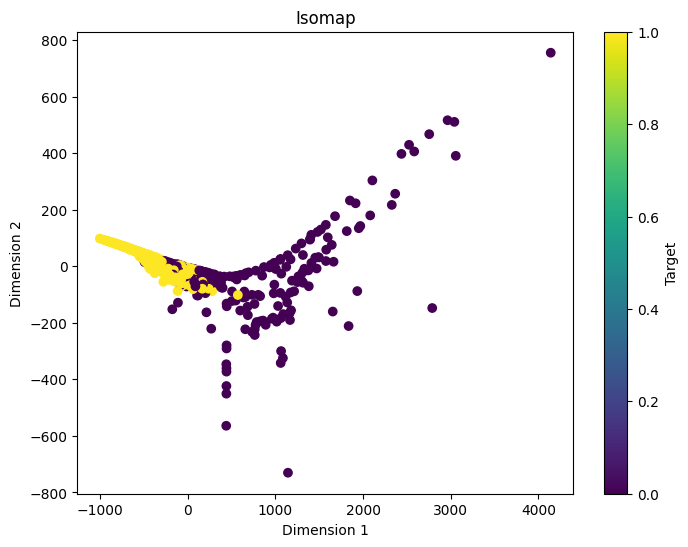

In [ ]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Build a Isomap model and reduce the dimensionality into 2.
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis')
plt.title('Isomap')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

## 2.2 Multi-Dimensional Scaling (MDS)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


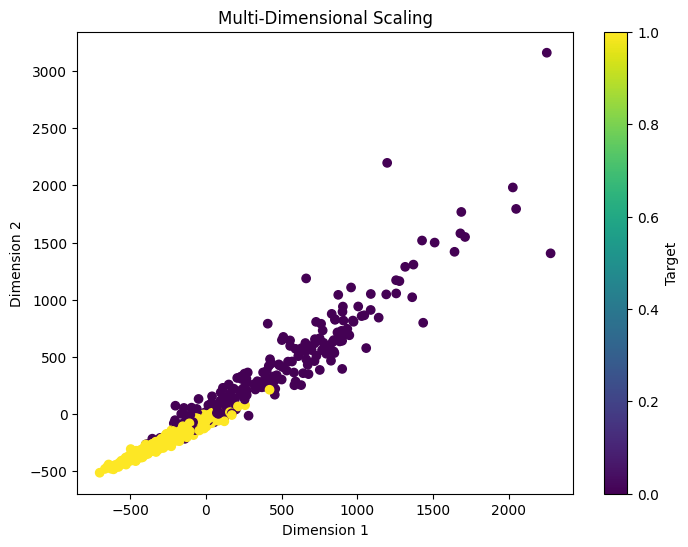

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Build a MDS model and reduce the dimensionality into 2.mds = MDS(n_components=2)
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis')
plt.title('Multi-Dimensional Scaling')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

## 2.3 Laplacian Eigenmap

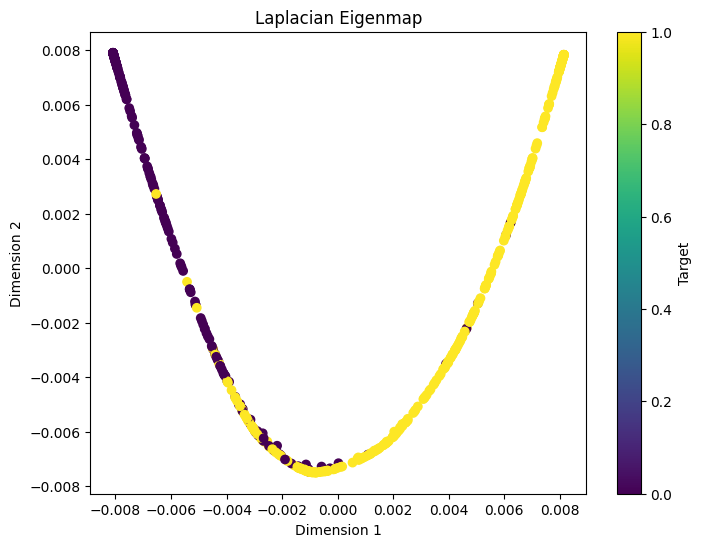

In [ ]:
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

# Build a Laplacian Eigenma model and reduce the dimensionality into 2.mds = MDS(n_components=2)
laplacian = SpectralEmbedding(n_components=2)
X_laplacian = laplacian.fit_transform(X)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_laplacian[:, 0], X_laplacian[:, 1], c=y, cmap='viridis')
plt.title('Laplacian Eigenmap')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

# Clustering
# 1. K-Means clustering


/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/daal4py/sklearn/cluster/_k_means_0_23.py:189: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


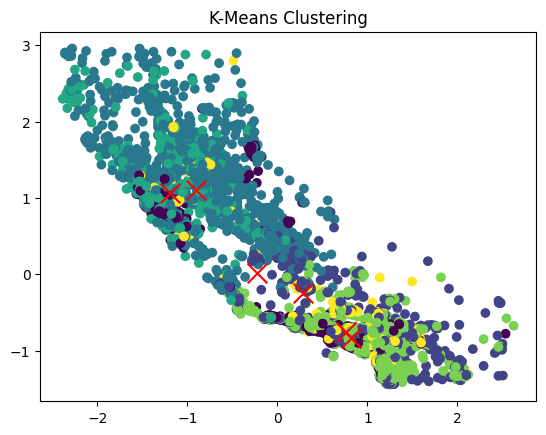

In [137]:
# Import KMeans clustering
from sklearn.cluster import KMeans

# Generate the dataset. Here, we assume that data is 2-dimensional data.
data = datasets.make_blobs(n_samples=50000, centers=4, random_state=42)

# K-Means clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train[:, :])

# Visualizing
plt.scatter(X_train[:, :][:, 0], X_train[:, :][:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('K-Means Clustering')
plt.show()

# 2. DBSCAN clustering

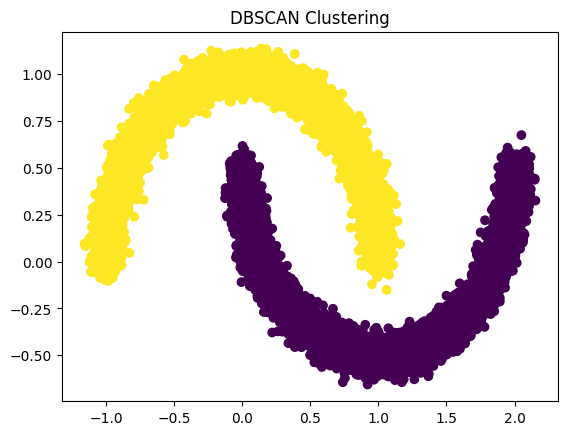

In [32]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Generate the dataset. Here, we assume that data is 2-dimensional data.
data = datasets.make_moons(n_samples=20000, noise=0.05, random_state=42)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(data[0])

# Visualizing
plt.scatter(data[0][:, 0], data[0][:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


# 3. Hierarchical clustering

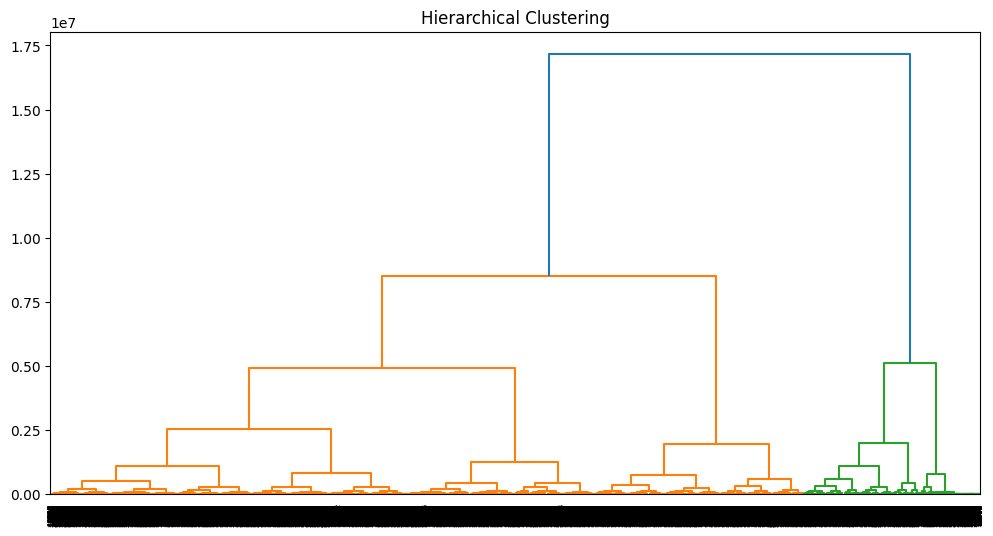

In [41]:
# Import hierarchical custering in scipy package
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the dataset
data = datasets.make_blobs(n_samples=300, centers=4, random_state=42)

# Calculate distance matrix
linked = linkage(X_train, method='ward')

# Visualizing dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=range(X_train.shape[0]), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering')
plt.show()
